# Titanic: Machine Learning from Disaster
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Kaggle Competition

In [1]:
import pandas as pd
df = pd.read_csv('titanictrain.csv', index_col='PassengerId')

## data preprocessing

In [2]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0


In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [6]:
df = df.dropna()

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## Split the data into a training set and a test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Build the decision tree model

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [10]:
clf = model.fit(X_train, y_train)

In [11]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8156424581005587

In [12]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,18,49


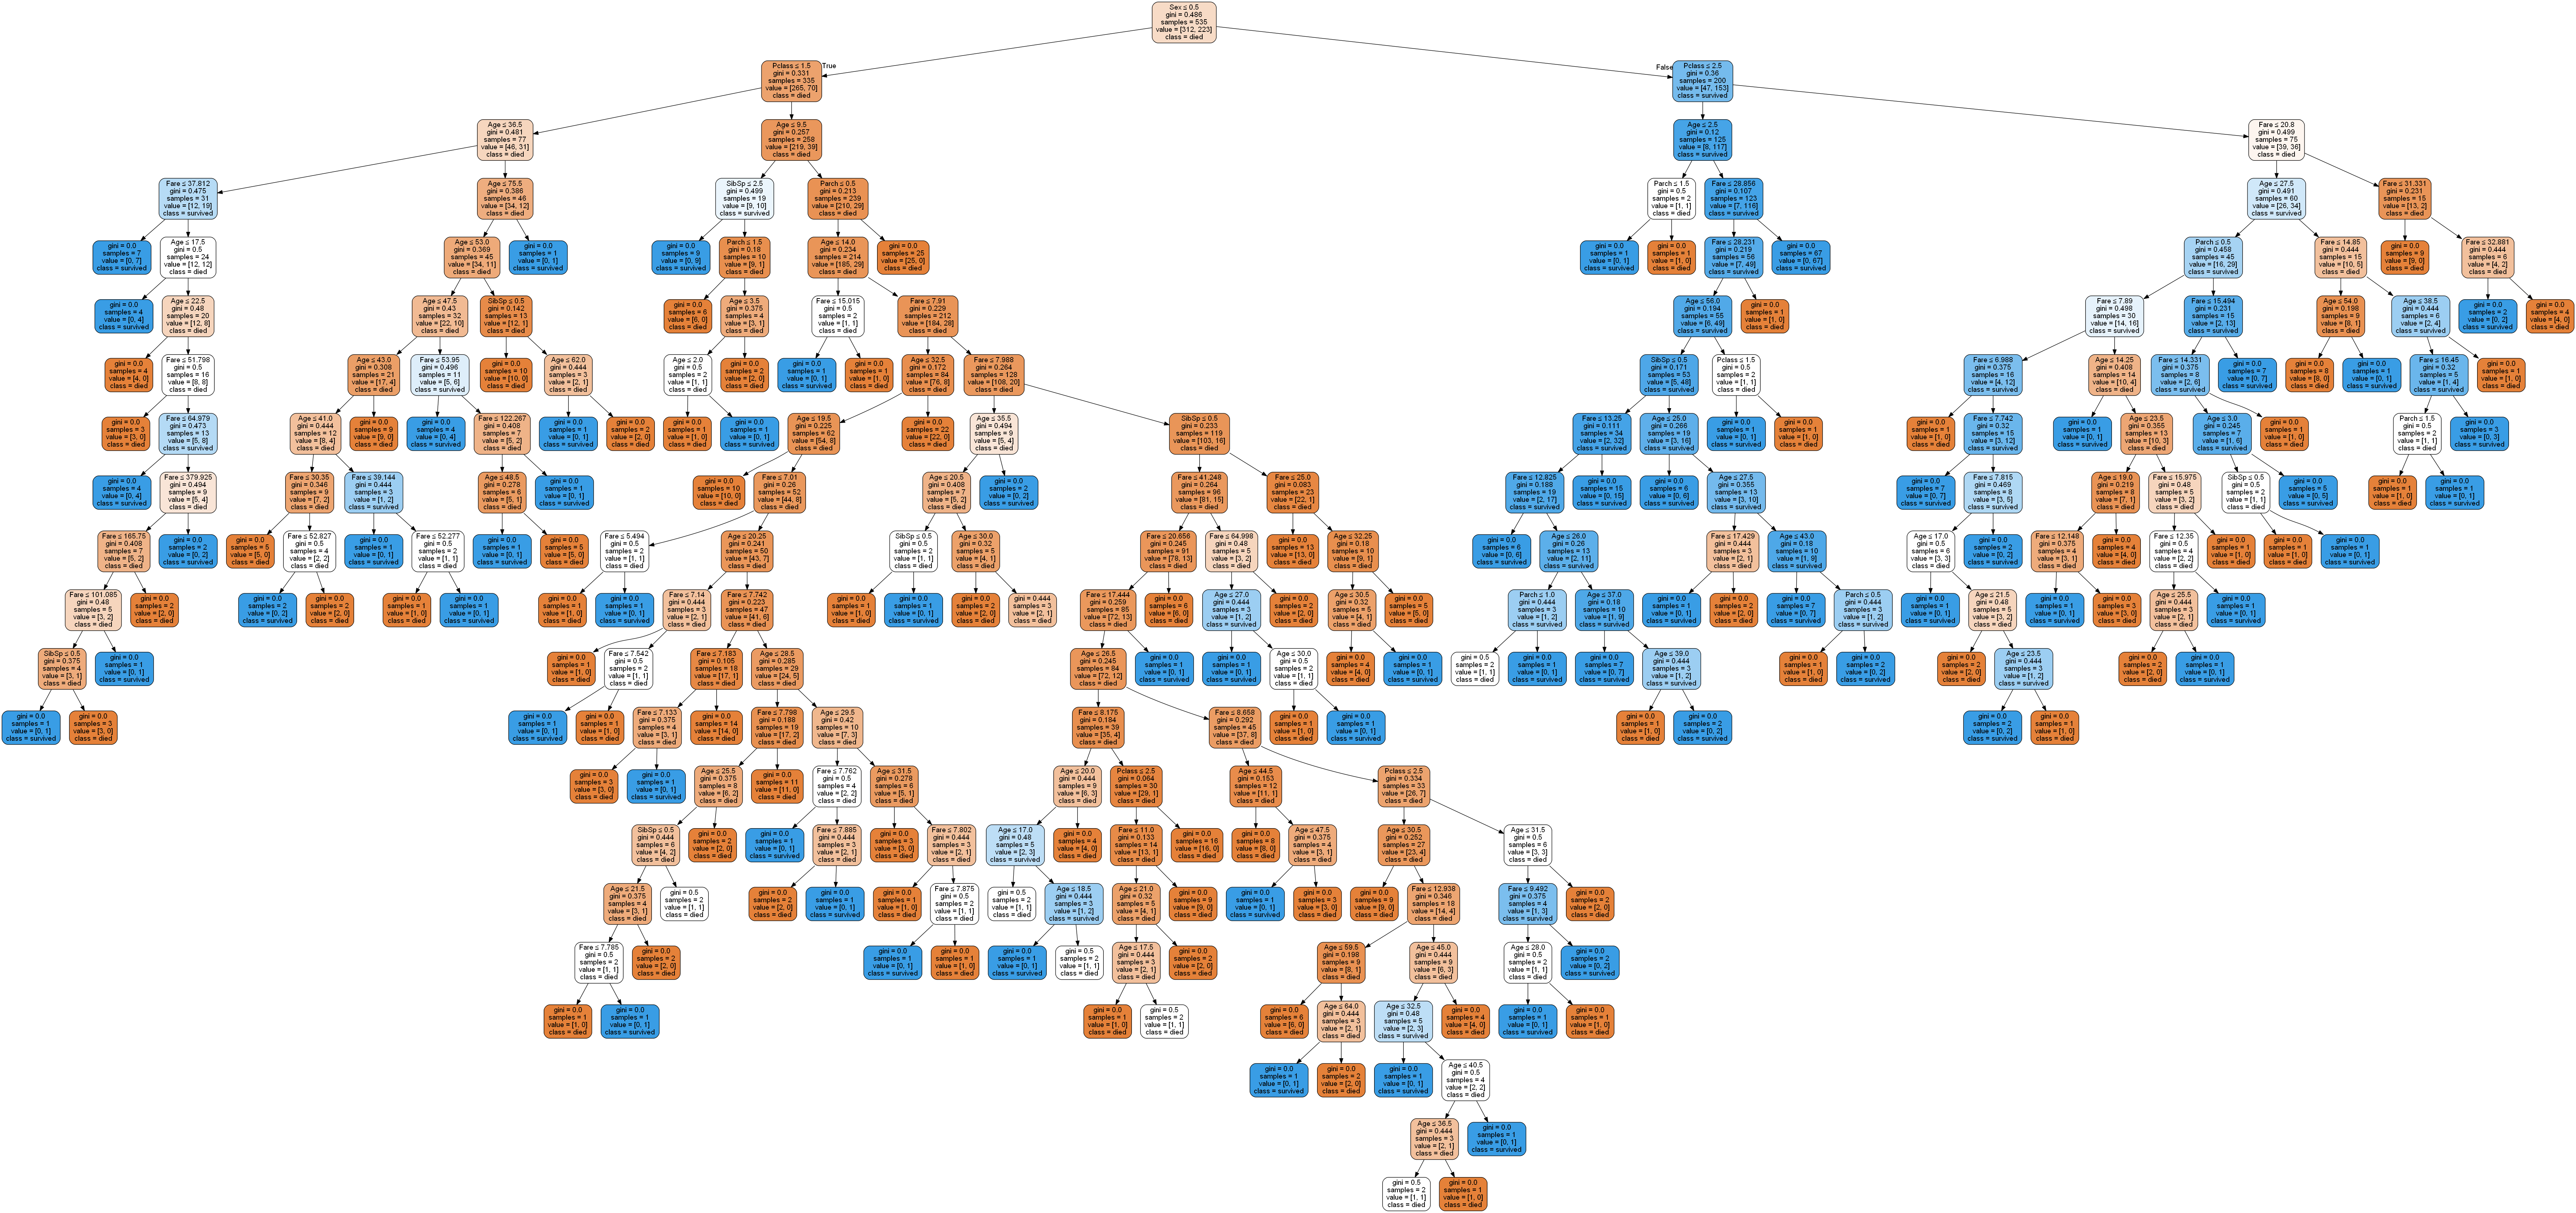

In [13]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['died','survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

## Cross validation

In [14]:
from sklearn.cross_validation import cross_val_score
depth = []
for i in range(3,30):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
    print("depth = ", i, " CV score = ", scores.mean())
    depth.append((i,scores.mean()))

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


depth =  3  CV score =  0.7776004947433519
depth =  4  CV score =  0.7794050060215474
depth =  5  CV score =  0.784971519708362
depth =  6  CV score =  0.7962516681313675
depth =  7  CV score =  0.8019653028675585
depth =  8  CV score =  0.7870741789538782
depth =  9  CV score =  0.7982065553494125
depth =  10  CV score =  0.7740884679230543
depth =  11  CV score =  0.7589974937343358
depth =  12  CV score =  0.751453634085213
depth =  13  CV score =  0.7515288220551379
depth =  14  CV score =  0.7365875728281743
depth =  15  CV score =  0.7535312306740879
depth =  16  CV score =  0.7347824105718843
depth =  17  CV score =  0.7385418090681249
depth =  18  CV score =  0.7348312339289783
depth =  19  CV score =  0.7291914852065228
depth =  20  CV score =  0.7310718354327376
depth =  21  CV score =  0.7254320867102821
depth =  22  CV score =  0.7366614588419099
depth =  23  CV score =  0.7348074732285258
depth =  24  CV score =  0.7253582006965466
depth =  25  CV score =  0.73841779774110

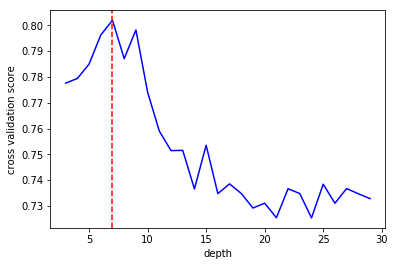

In [16]:
import matplotlib.pyplot as plt
plt.plot(*zip(*depth), 'b')
value, index = max((v[1], i) for i,v in enumerate(depth))
plt.axvline(x=depth[index][0], color='r', linestyle='dashed')
plt.xlabel('depth')
plt.ylabel('cross validation score')
plt.show()

In [17]:
model = tree.DecisionTreeClassifier(max_depth=7)
clf = model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8491620111731844

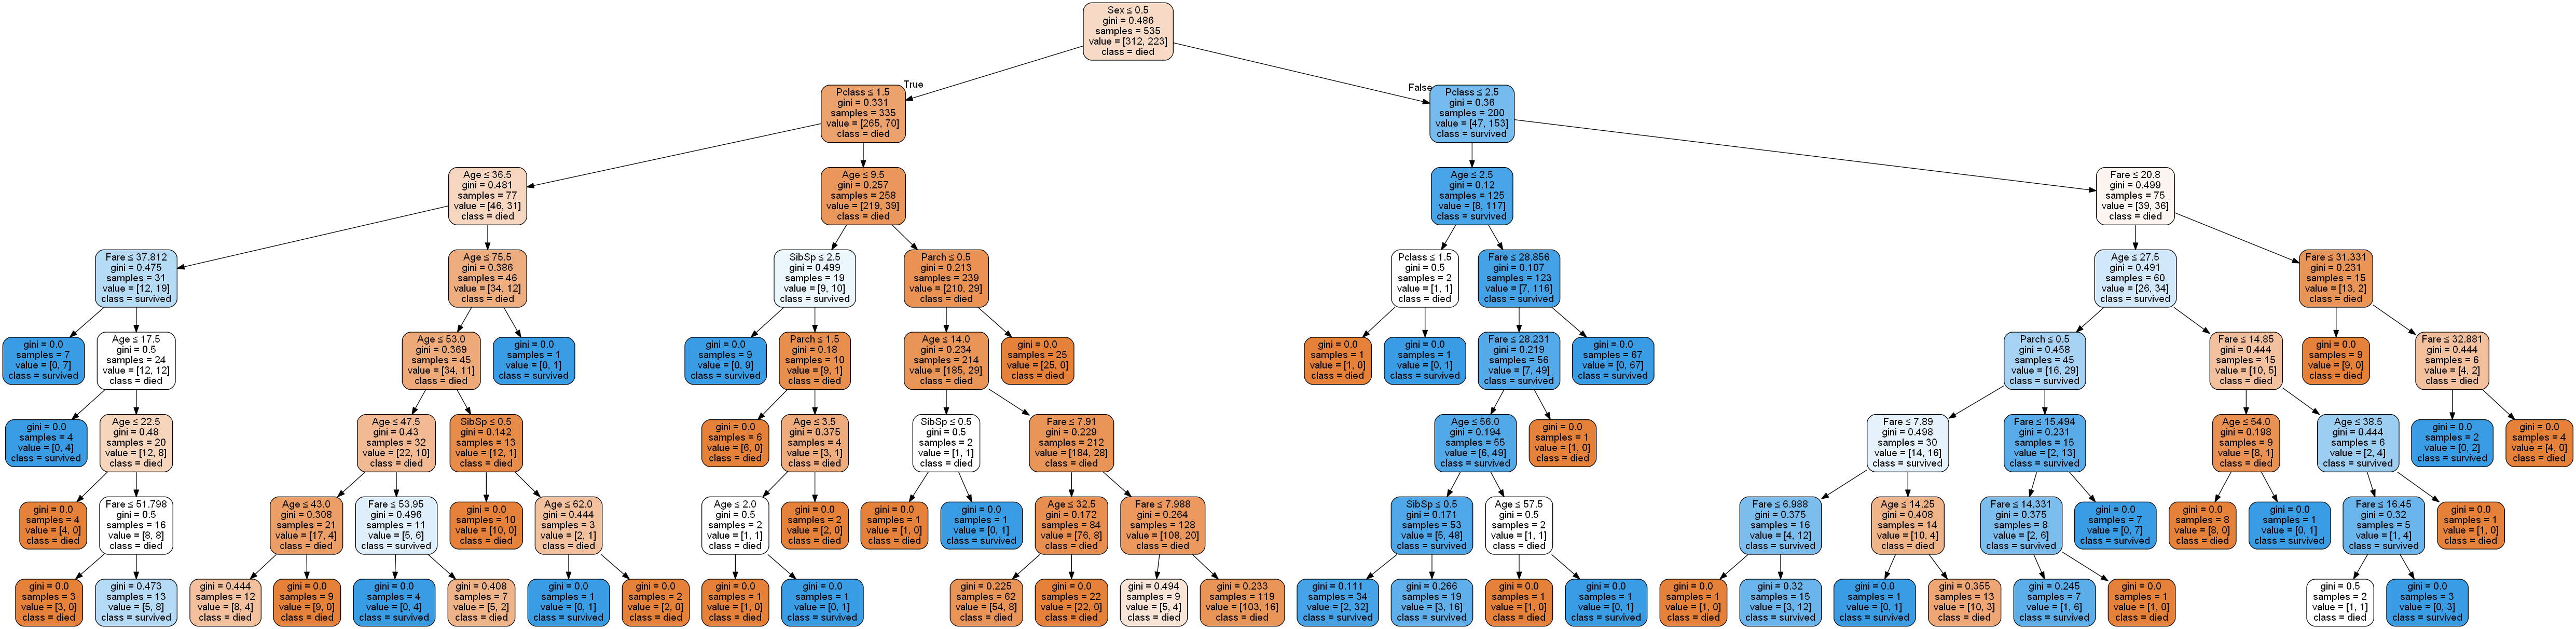

In [18]:
dot_data = StringIO()
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['died','survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())